In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from matplotlib.lines import Line2D

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16

In [22]:
def CAMP_PDEP(t, x, k1, k3, k2, r1, r2, r3, r4, Km1, Km2, Km3, Km4, Dt, Et, W0, W1):
    cAMP, PDEpt = x

    numerator1 = cAMP * r1 * (-0.5 * Km2 + 0.5 * W0) + (-0.5 * cAMP * r1 - 0.5 * cAMP * r2 - 0.5 * Km1 * r2 - 0.5 * r2 * W0) * Dt
    denominator1 = cAMP * r1 - 1. * r2 * Dt
    numerator2 = cAMP ** 2 * r1 ** 2 * (Km2 ** 2 + 2. * Km2 * W0 + W0 ** 2) + cAMP * r1 * (cAMP * (2. * Km2 * r1 + 2. * Km2 * r2 + 2. * r1 * W0 - 2. * r2 * W0) + r2 * (2. * Km1 * Km2 - 2. * Km1 * W0 - 2. * Km2 * W0 - 2. * W0 ** 2)) * Dt + (cAMP ** 2 * (r1 ** 2 + 2. * r1 * r2 + r2 ** 2) + cAMP * r2 * (2. * Km1 * r1 + 2. * Km1 * r2 - 2. * r1 * W0 + 2. * r2 * W0) + r2 ** 2 * (Km1 ** 2 + 2. * Km1 * W0 + W0 ** 2)) * Dt ** 2
    denominator2 = (cAMP * r1 - 1. * r2 * Dt) ** 2

    ACpt = numerator1 / denominator1 - 0.5 * np.sqrt(numerator2 / denominator2)


    dcAMP = k1 * W0 * ACpt - (k2*PDEpt + k3) * cAMP
    dPDEpt = r3 * cAMP * ((W1 - PDEpt) / Km3 + cAMP + (W1 - PDEpt)) - r4 * Et * PDEpt / (Km4 + PDEpt + Et)

    return [dcAMP, dPDEpt]


def plot_nullclines(k1, k3, k2, r1, r2, r3, r4, Km1, Km2, Km3, Km4, Dt, Et, W0, W1):
    cAMP_vals = np.linspace(-50, 50, 10000)
    PDEp_vals = np.linspace(-50, 50, 10000)
    cAMP_grid, PDEp_grid = np.meshgrid(cAMP_vals, PDEp_vals)

    t = 0
    x = np.array([cAMP_grid, PDEp_grid])
    nullclines = CAMP_PDEP(t, x, k1, k3, k2, r1, r2, r3, r4, Km1, Km2, Km3, Km4, Dt, Et, W0, W1)
    print(nullclines)
    plt.figure(figsize=(8, 6))
    plt.scatter(0, 0, color='black', marker='o', label='Fixed point (0,0)', alpha=1, zorder=10)
    plt.scatter(0.110, 3.241, color='black', marker='o', label='Fixed point (0.951867,1.65682)', zorder=10)
    plt.contour(cAMP_grid, PDEp_grid, nullclines[0], levels=[0], colors='#1f77b4', linestyles='solid')
    plt.grid(linestyle=':', color='lightgray')
    plt.contour(cAMP_grid, PDEp_grid, nullclines[1], levels=[0], colors='green', linestyles='solid')
    plt.xlabel('cAMP')
    plt.ylabel('PDEpt')
    custom_lines = [Line2D([0], [0], color='#1f77b4', lw=2),
                    Line2D([0], [0], color='green', lw=2),
                    Line2D([0], [0], color='black', marker='o', linestyle='None')]

    plt.legend(custom_lines, ['cAMP nullcline', 'PDEp nullcline', 'Fixed points (0,0) and (0.11, 3.24)'], loc='lower right', bbox_to_anchor=(1, 0.4))
    plt.title(f'PDEpt and cAMP nullclines')
    plt.ylim(-0.5, 12)
    plt.xlim(-0.05, 2.0)
    #plt.xlim(-3,30)
    #plt.ylim(-3,30)
    plt.savefig(f'2D_nullcline_PDEPt_cAMP_tQSSA', dpi=300)
    plt.show()


k = 6
W0 = 6.57 #
W1 = 10
k1 = 1.09 /k
k3 = 3.5 /k #or 5.50
k2 = 5.25 /k# was good or 19

r1, r2, r3, r4 =  2.13 / k,  1.62 / k, 0.56 / k, 0.94 / k
Km1, Km2, Km3, Km4 = 1.401430143014302, 5, 5.1, 4.3
Dt =  3.116001600160016
Et = 1.5


[array([[-2169.10062445, -2168.66880165, -2168.23697882, ...,
         2145.4536572 ,  2145.88550516,  2146.31735307],
       [-2168.66308069, -2168.23134542, -2167.7996101 , ...,
         2145.01628848,  2145.44804893,  2145.87980932],
       [-2168.22553694, -2167.79388918, -2167.36224138, ...,
         2144.57891976,  2145.01059269,  2145.44226556],
       ...,
       [ 2205.02428805,  2204.58119836,  2204.13810873, ...,
        -2226.92143034, -2227.36449485, -2227.80755942],
       [ 2205.4618318 ,  2205.0186546 ,  2204.57547745, ...,
        -2227.35879906, -2227.80195109, -2228.24510318],
       [ 2205.89937555,  2205.45611084,  2205.01284617, ...,
        -2227.79616778, -2228.23940733, -2228.68264693]]), array([[-101.83446456, -101.8608108 , -101.88713837, ...,  567.64883484,
         567.80913659,  567.96945701],
       [-101.77864896, -101.80500637, -101.8313451 , ...,  567.59302761,
         567.7533182 ,  567.91362746],
       [-101.72283336, -101.74920194, -101.77555184, 

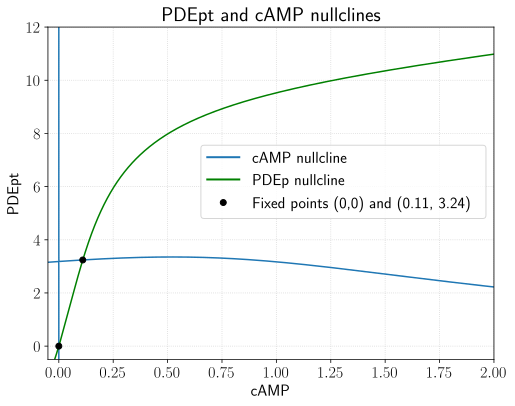

In [23]:
plot_nullclines(k1, k3, k2, r1, r2, r3, r4, Km1, Km2, Km3, Km4, Dt, Et, W0, W1)